# Problem Statement

HEART STROKE ANALYSIS USING MACHINE LEARNING TECHNIQUES

Based on the training dataset, we will develop a model to predict whether a person suffers from heart stroke or not.

# Data Description

- id - ID number
- age - person's age (number of days)
- gender - person's gender (1-Female , 2-Male)
- height - person's height (in cm)
- weight - person's weight (in kg)
- ap_hi - Systolic blood pressure
- ap_lo - Diastolic blood pressure
- cholesterol - person's cholesterol level (1-Normal , 2-Above normal , 3-Well above normal)
- gluc - person's glucose level (1-Normal , 2-Above normal , 3-Well above normal)
- smoke - Whether patient smokes or not (0-Does not smoke , 1-Smoke)
- alco - Alcohol intake (0-Does not take alcohol , 1-Take alcohol)
- active - Physical activity (0-No activity , 1-Physical activity)
- cardio - Target variable (0-No stroke , 1-Stroke)

# Loading the dataset

In [2]:
import pandas as pd
import numpy as np
from numpy import argmax
from numpy import array

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv(r"Desktop\heart_data.csv")

In [3]:
df.shape

(70000, 13)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


# Data Preprocessing

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


- Thus we see all variables are continuous, there are no categorical variables.
- Comparing the 75% and the max value, determines the presence of outliers.
- By observing the count of all variables we get to know that there are no missing values.

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

- This verifies absence of categorical values as object data type is absent.

## Drop duplicates (if any)

In [9]:
df.drop_duplicates()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


- We have no duplicates. Hence the shape did not chnage.

## Plot the correlation matrix

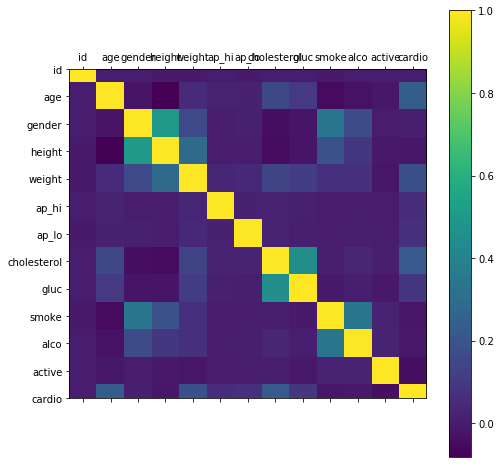

In [10]:
rcParams['figure.figsize'] = 20 , 8
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

- We see that there is no such single feature that has a very high correlation with the target variable.

## Histogram

Text(0.5, 0, 'age')

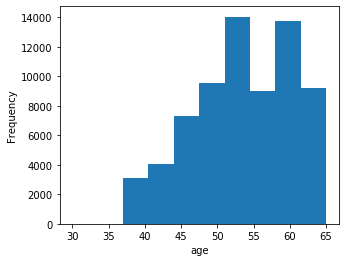

In [11]:
rcParams['figure.figsize'] = 5 , 4
df['age'].plot.hist()
plt.xlabel('age')

Text(0.5, 0, 'gender')

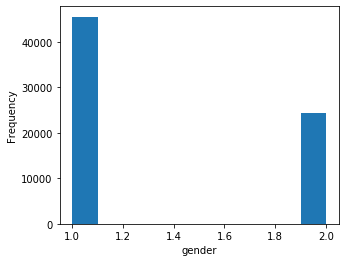

In [12]:
rcParams['figure.figsize'] = 5 , 4
df['gender'].plot.hist()
plt.xlabel('gender')

Text(0.5, 0, 'ap_hi')

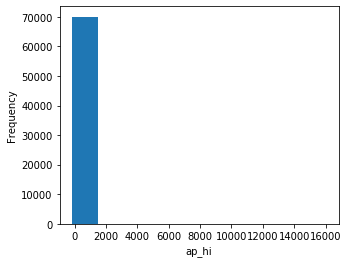

In [13]:
rcParams['figure.figsize'] = 5 , 4
df['ap_hi'].plot.hist()
plt.xlabel('ap_hi')

Text(0.5, 0, 'ap_lo')

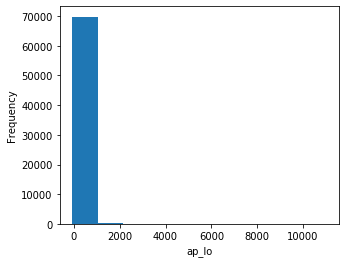

In [14]:
rcParams['figure.figsize'] = 5 , 4
df['ap_lo'].plot.hist()
plt.xlabel('ap_lo')

Text(0.5, 0, 'gluc')

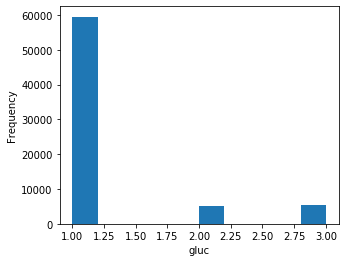

In [15]:
rcParams['figure.figsize'] = 5 , 4
df['gluc'].plot.hist()
plt.xlabel('gluc')

Text(0.5, 0, 'cholesterol')

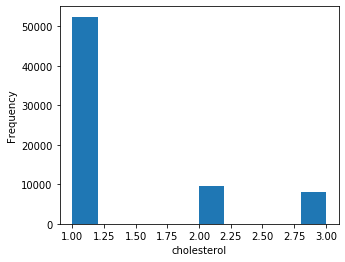

In [16]:
rcParams['figure.figsize'] = 5 , 4
df['cholesterol'].plot.hist()
plt.xlabel('cholesterol')

Text(0.5, 0, 'height')

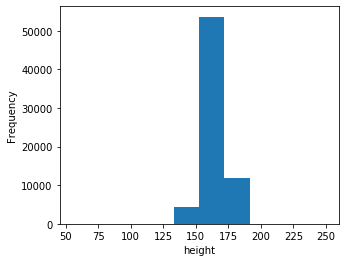

In [17]:
rcParams['figure.figsize'] = 5 , 4
df['height'].plot.hist()
plt.xlabel('height')

Text(0.5, 0, 'weight')

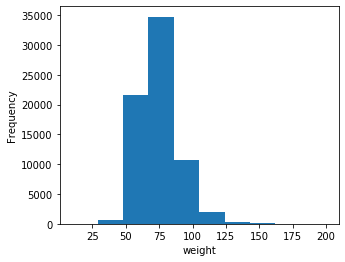

In [18]:
rcParams['figure.figsize'] = 5 , 4
df['weight'].plot.hist()
plt.xlabel('weight')

Text(0.5, 0, 'smoke')

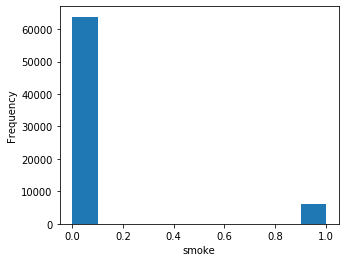

In [19]:
rcParams['figure.figsize'] = 5 , 4
df['smoke'].plot.hist()
plt.xlabel('smoke')

Text(0.5, 0, 'alco')

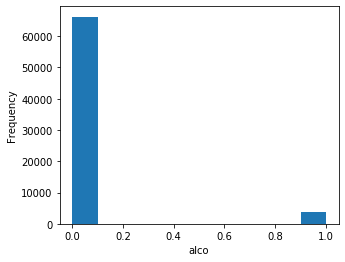

In [20]:
rcParams['figure.figsize'] = 5 , 4
df['alco'].plot.hist()
plt.xlabel('alco')

Text(0.5, 0, 'active')

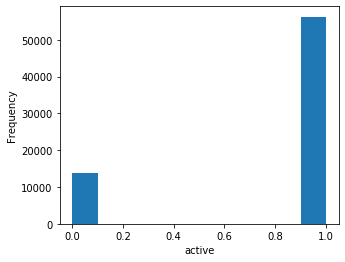

In [21]:
rcParams['figure.figsize'] = 5 , 4
df['active'].plot.hist()
plt.xlabel('active')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D2D3DC4C8>,
      dtype=object)

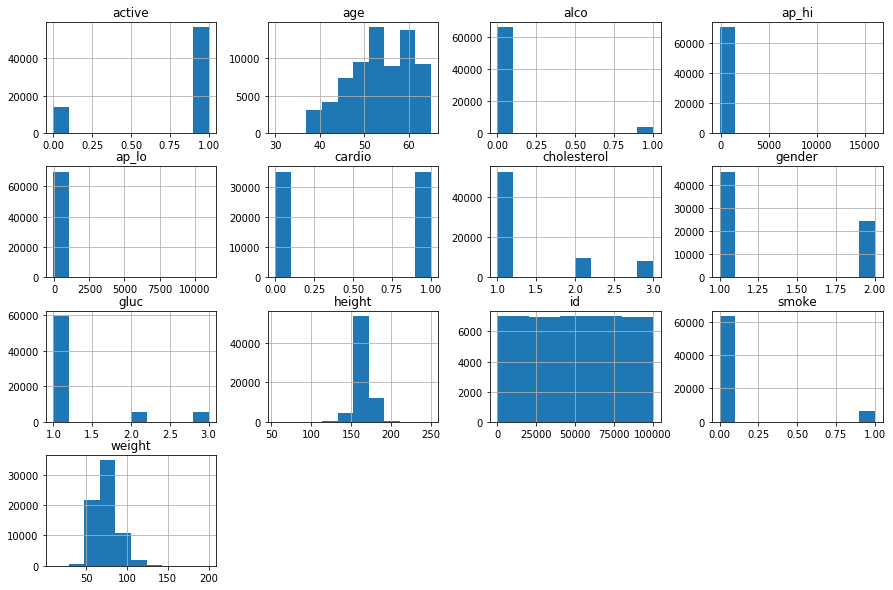

In [22]:
rcParams['figure.figsize'] = 15,10
df.hist()

- Some of the variables show presence of outliers 
- Also we see many categorical variables but all are declared as continuous by assigning (int,float) data types.

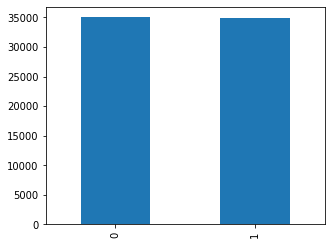

In [23]:
rcParams['figure.figsize'] = 5 , 4
df['cardio'].value_counts().plot(kind = 'bar') 

- Target class is balanced.

## Change the data types

In [24]:
df = df.astype({'gender': 'object', 'active': 'object', 'cholesterol': 'object', 'gluc': 'object' , 'smoke': 'object', 'alco': 'object'})

In [25]:
df.dtypes

id               int64
age              int64
gender          object
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio           int64
dtype: object

In [26]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,NaN
top,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,NaN
freq,NaN,NaN,45530.0,NaN,NaN,NaN,NaN,52385.0,59479.0,63831.0,66236.0,56261.0,NaN
mean,49972.419900,53.338686,NaN,164.359229,74.205690,128.817286,96.630414,NaN,NaN,NaN,NaN,NaN,0.499700
std,28851.302323,6.765294,NaN,8.210126,14.395757,154.011419,188.472530,NaN,NaN,NaN,NaN,NaN,0.500003
min,0.000000,30.000000,NaN,55.000000,10.000000,-150.000000,-70.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,25006.750000,48.000000,NaN,159.000000,65.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,50001.500000,54.000000,NaN,165.000000,72.000000,120.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,74889.250000,58.000000,NaN,170.000000,82.000000,140.000000,90.000000,NaN,NaN,NaN,NaN,NaN,1.000000


## Handling categorical variables

### One Hot Encoding Dummy method

In [27]:
df = pd.get_dummies(df, columns = ['gender', 'alco', 'gluc', 'smoke', 'cholesterol', 'active'])

In [28]:
df.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,gender_1,gender_2,alco_0,...,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,cholesterol_1,cholesterol_2,cholesterol_3,active_0,active_1
0,0,50,168,62.0,110,80,0,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,1,55,156,85.0,140,90,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
2,2,52,165,64.0,130,70,1,1,0,1,...,1,0,0,1,0,0,0,1,1,0
3,3,48,169,82.0,150,100,1,0,1,1,...,1,0,0,1,0,1,0,0,0,1
4,4,48,156,56.0,100,60,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0


### Segregating variables - Dependent & Independent 

In [8]:
#seperating independent and dependent variables

x = df.drop(['cardio'], axis=1)
y = df['cardio']

### Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

### Train and test split

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

## Apply Algorithms

## 1) k-NN

### Implementing k-NN with cross-validation

In [35]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking consistency using cross-validation

In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.55132356, 0.55132356, 0.5458008 , 0.5505618 , 0.54209524,
       0.54857143, 0.55439131, 0.5587731 , 0.54105544, 0.53114879])

In [37]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(54.750450207484214, 0.7452031048496276)

### Automating the process of cross validation for different k-neighbours

In [38]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [39]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

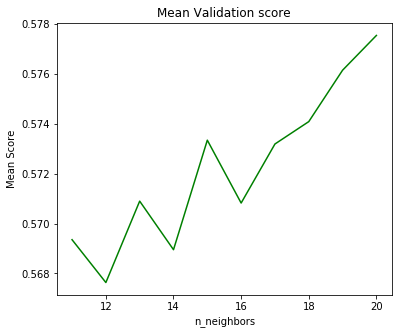

In [40]:
rcParams['figure.figsize'] = 6, 5
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

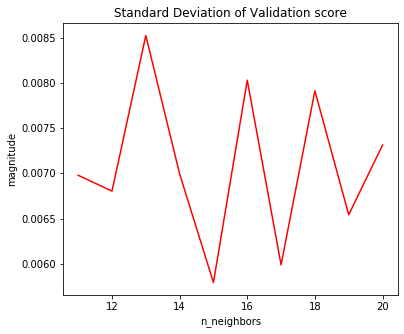

In [41]:
rcParams['figure.figsize'] = 6, 5
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [42]:
clf = KNN(n_neighbors = 20)
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score1, score

(0.6328, 0.5770285714285714)

In [43]:
pred1 = clf.predict(test_x)
pred1[:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

## 2) Logistic Regression

### Normalising the data 

In [44]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
cols = train_x.columns
cols

Index(['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender_1',
       'gender_2', 'alco_0', 'alco_1', 'gluc_1', 'gluc_2', 'gluc_3', 'smoke_0',
       'smoke_1', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3',
       'active_0', 'active_1'],
      dtype='object')

In [47]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,id,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,alco_0,alco_1,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,cholesterol_1,cholesterol_2,cholesterol_3,active_0,active_1
0,0.741850,0.299032,0.769737,0.326316,0.015461,0.011743,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.087854,0.805652,0.723684,0.310526,0.016698,0.013550,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.722169,0.795199,0.723684,0.263158,0.016698,0.013550,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.614995,0.879597,0.690789,0.394737,0.016698,0.013550,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.941328,0.745799,0.690789,0.436842,0.016698,0.013550,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [48]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,id,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,alco_0,alco_1,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,cholesterol_1,cholesterol_2,cholesterol_3,active_0,active_1
0,0.764201,0.562834,0.756579,0.289474,0.016698,0.013550,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.794142,0.786837,0.723684,0.289474,0.016698,0.013550,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.559322,0.627720,0.796053,0.321053,0.019171,0.014453,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.477709,0.297871,0.736842,0.273684,0.016698,0.013550,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.722869,0.684785,0.677632,0.268421,0.016945,0.014092,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Implementing Logistic Regression

In [49]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [50]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#importing train_test_split to create validation set
# Calculating f1-score
from sklearn.model_selection import train_test_split
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7030245484936601


In [52]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )
pred2 = logreg.predict(test_x)
pred2[:10], logreg.score(test_x, test_y)

Test f1_score     0.7014880414482799


(array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64), 0.7168571428571429)

## 3) Decision Tree

In [53]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split
#creating the train and validation set
x_train, test_x, y_train, test_y = train_test_split(x, y, random_state = 101, stratify=None, test_size=0.25)

In [54]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.50059
0    0.49941
Name: cardio, dtype: float64

In [55]:
# distribution in training set
test_y.value_counts(normalize=True)

0    0.502971
1    0.497029
Name: cardio, dtype: float64

In [56]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [57]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [58]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [59]:
#checking the training score
dt_model.score(x_train, y_train)

1.0

In [60]:
#checking the validation score
dt_model.score(test_x, test_y)

0.6337714285714285

### Changing the maximum depth

In [61]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(test_x, test_y))

In [62]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.713524,0.715029
1,2,0.713524,0.715029
2,3,0.725410,0.726914
3,4,0.729962,0.728286
4,5,0.734019,0.727371


Text(0, 0.5, 'performance')

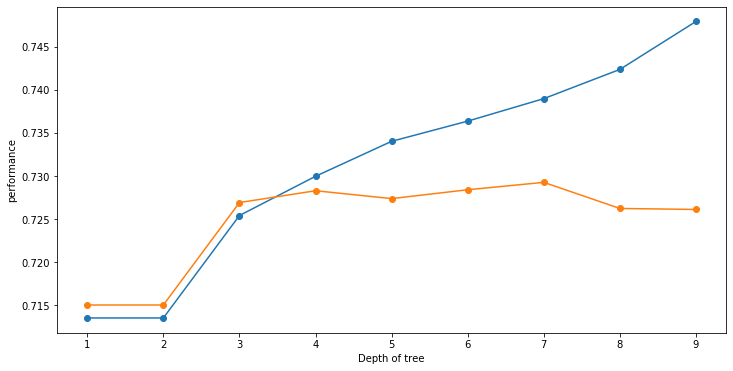

In [63]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

- blue line = train_accuracy
- yellow line = validation_accuracy

In [64]:
dt_model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=100, random_state=10)

In [65]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [66]:
#Training score
dt_model.score(x_train, y_train)

0.7387809523809524

In [67]:
#Validation score
dt_model.score(test_x, test_y)

0.7292

In [68]:
pred3 = dt_model.predict(test_x)
pred3[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

## 4) Random forest

In [10]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [11]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96, n_estimators=100, max_depth=15)

In [12]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [13]:
#score on training data
clf.score(train_x, train_y)

0.8218666666666666

In [14]:
#score on test data
clf.score(test_x, test_y)

0.7322857142857143

In [79]:
pred4 = clf.predict(test_x)
pred4[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [80]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=train_x.columns)

id               0.086743
age              0.158075
height           0.065901
weight           0.087276
ap_hi            0.334774
ap_lo            0.130221
gender_1         0.006525
gender_2         0.006705
alco_0           0.004521
alco_1           0.004538
gluc_1           0.008220
gluc_2           0.005195
gluc_3           0.006456
smoke_0          0.005000
smoke_1          0.004685
cholesterol_1    0.030833
cholesterol_2    0.008699
cholesterol_3    0.031899
active_0         0.006965
active_1         0.006769
dtype: float64

## 5) SVM

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
classifier.score(train_x, train_y)

0.7176190476190476

In [90]:
classifier.score(test_x, test_y)

0.7172

In [91]:
pred5 = classifier.predict(test_x)
pred5[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

## 6) Neural Network

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
clf= MLPClassifier(random_state=1)

In [94]:
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [95]:
clf.score(train_x, train_y)

0.634552380952381

In [96]:
clf.score(test_x, test_y)

0.6388571428571429

## 7) XGBoost

In [40]:
!pip install xgboost

In [36]:
import xgboost as xgb

In [37]:
from xgboost import XGBClassifier

In [38]:
clf = xgb.XGBClassifier(learning_rate=0.2, random_state=12)

In [39]:
clf.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
clf.score(train_x, train_y)

0.7414095238095239

In [41]:
clf.score(test_x, test_y)

0.7344571428571428

In [42]:
pred6 = clf.predict(test_x)
pred6[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

## 8) Artificial Neural Network (ANN)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [45]:
x_train = np.random.random((52500, 20))
y_train = np.random.randint(2, size=(52500, 1))
x_test = np.random.random((17500, 20))
y_test = np.random.randint(2, size=(17500, 1))

clf=Sequential()
clf.add(Dense(64, activation = 'relu', input_dim = 20))
clf.add(Dense(64, activation = 'relu'))
clf.add(Dense(1, activation = 'sigmoid'))
clf.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

clf.fit(train_x, train_y, batch_size=100, nb_epoch=200)

Epoch 1/200
52500/52500 [==============================] - 6s 109us/step - loss: 0.6090 - accuracy: 0.6781
Epoch 2/200
52500/52500 [==============================] - 2s 36us/step - loss: 0.5713 - accuracy: 0.7234
Epoch 3/200
52500/52500 [==============================] - 2s 35us/step - loss: 0.5650 - accuracy: 0.7276
Epoch 4/200
52500/52500 [==============================] - 2s 38us/step - loss: 0.5601 - accuracy: 0.7315 0s - loss: 0.5609 - accuracy: 0.
Epoch 5/200
52500/52500 [==============================] - 2s 38us/step - loss: 0.5560 - accuracy: 0.7321
Epoch 6/200
52500/52500 [==============================] - 2s 39us/step - loss: 0.5509 - accuracy: 0.7331
Epoch 7/200
52500/52500 [==============================] - 2s 42us/step - loss: 0.5469 - accuracy: 0.7319
Epoch 8/200
52500/52500 [==============================] - 2s 36us/step - loss: 0.5431 - accuracy: 0.7341
Epoch 9/200
52500/52500 [==============================] - 2s 36us/step - loss: 0.5418 - accuracy: 0.7356
Epoch 10/200

52500/52500 [==============================] - 2s 37us/step - loss: 0.5250 - accuracy: 0.7445
Epoch 77/200
52500/52500 [==============================] - 2s 44us/step - loss: 0.5247 - accuracy: 0.7453
Epoch 78/200
52500/52500 [==============================] - 3s 61us/step - loss: 0.5234 - accuracy: 0.7449
Epoch 79/200
52500/52500 [==============================] - 3s 49us/step - loss: 0.5261 - accuracy: 0.7453
Epoch 80/200
52500/52500 [==============================] - 3s 48us/step - loss: 0.5244 - accuracy: 0.7441
Epoch 81/200
52500/52500 [==============================] - 2s 38us/step - loss: 0.5252 - accuracy: 0.7462
Epoch 82/200
52500/52500 [==============================] - 2s 43us/step - loss: 0.5222 - accuracy: 0.7464
Epoch 83/200
52500/52500 [==============================] - 2s 40us/step - loss: 0.5244 - accuracy: 0.7458
Epoch 84/200
52500/52500 [==============================] - 2s 37us/step - loss: 0.5235 - accuracy: 0.7464
Epoch 85/200
52500/52500 [========================

In [48]:
score = clf.evaluate(test_x, test_y)
print(score)

17500/17500 [==============================] - ETA:  - 1s 44us/step
[0.5921010016713824, 0.7176571488380432]


In [47]:
pred7 = clf.predict(test_x)
pred7[:10]

array([[0.06197959],
       [0.39431372],
       [0.9269915 ],
       [0.17760056],
       [0.41515115],
       [0.400299  ],
       [0.8780524 ],
       [0.5743269 ],
       [0.01837492],
       [0.13347873]], dtype=float32)